Student Name: Tom Keane

Student ID: 20214537

Please use this notebook to work on Task 2. You should not import any additional modules.

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [73]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

TEST DATA

# A 20x2 data-set is reduced to it's first principal componant (PC1) - a 20x1 reduced-data-set,
#       This can be achieved by centering the data-set,
#       then dotting the data-set with it's eigenvectors.
#           This all occurs with the function; pca.fit_transform(data)

# This reduced-data-set can be viewed from the PC1 reference frame as a straight horizontal      line.
# The reduced-data-set can then be viewed from the original reference frame by the following formula; PCA_reconstruction=PC1 ⋅ Eigenvectors⊤ + Mean.


#sources I used for learning:
    # https://dev.to/akaame/implementing-simple-pca-using-numpy-3k0a

    # https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com

In [74]:
targetComponents=1
a_x = 0.05
a_y= 10
pca = PCA(targetComponents)

In [75]:
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning toolboxes.


In [76]:
data.shape

(20, 2)

In [77]:
print("\nData: \n", str(data))



Data: 
 [[ 0.          0.10143774]
 [ 1.01857522  6.17945188]
 [ 1.95094083  4.89059747]
 [ 3.06041152  9.64615421]
 [ 3.90127513 17.54749283]
 [ 5.04741546 15.69545215]
 [ 5.96949258 21.65301175]
 [ 6.94394003 23.66543982]
 [ 7.87335794 35.962017  ]
 [ 8.98292327 33.06462138]
 [ 9.89091197 36.07046645]
 [10.83468994 43.11425296]
 [11.73827537 45.4692415 ]
 [13.06665432 49.23677398]
 [13.9654332  51.33512286]
 [15.25752599 62.49890486]
 [15.8598919  66.22727156]
 [16.75036109 72.60700222]
 [17.91130171 75.15363879]
 [19.13724843 80.44226952]]


In [78]:
reducedData = pca.fit_transform(data) 
print("\nReduced: \n", str(reducedData))


Reduced: 
 [[-38.59728373]
 [-32.44714196]
 [-33.48941058]
 [-28.60615071]
 [-20.72125615]
 [-22.26312005]
 [-16.25226503]
 [-14.07064378]
 [ -1.88613123]
 [ -4.45414566]
 [ -1.32043989]
 [  5.75296862]
 [  8.25196387]
 [ 12.22315571]
 [ 14.47117766]
 [ 25.63545172]
 [ 29.40294384]
 [ 35.8176375 ]
 [ 38.56192021]
 [ 43.99076963]]


[&lt;matplotlib.lines.Line2D at 0x1ea82a90&gt;]

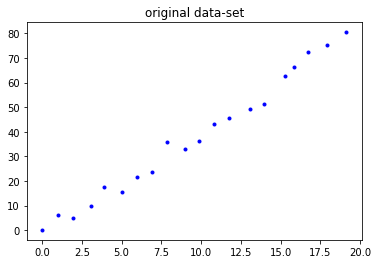

In [79]:
plt.title("original data-set")
plt.plot(data[:,0],data[:,1],'.b')

[&lt;matplotlib.lines.Line2D at 0x1eac50e8&gt;]

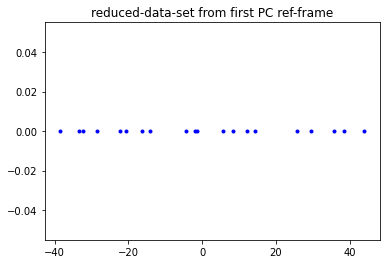

In [80]:
reducedDataFromPC1 = np.array([[reducedData[i],0] for i in range(20)])

plt.title("reduced-data-set from first PC ref-frame")
plt.plot(reducedDataFromPC1[:,0], reducedDataFromPC1[:,1], '.b')

In [81]:
dataMean = data.mean(axis=0)
eigenvalues = np.array(pca.explained_variance_)
eigenvectors = np.array(pca.components_)
print("\ndata mean:\n"+str(dataMean))
print("\neigenvalues:\n"+str(eigenvalues))
print("\neigenvectors:\n"+str(eigenvectors))


data mean:
[ 9.4580313  37.52803105]

eigenvalues:
[662.18582151]

eigenvectors:
[[0.22804819 0.97364985]]


[&lt;matplotlib.lines.Line2D at 0x1eaf2250&gt;]

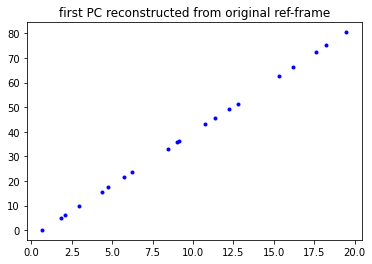

In [82]:
reconstruction = np.dot(reducedDataFromPC1,eigenvectors.T) + dataMean
plt.title("first PC reconstructed from original ref-frame")
plt.plot(reconstruction[:,0], data[:,1], '.b')